In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd
import os
import datetime
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [26]:
import os
pd.set_option('display.max_colwidth', -1)
for file in os.listdir("."):
    if file.endswith(".xlsx"):
        xlsxfile = pd.ExcelFile(file)
        data = xlsxfile.parse('Key Metrics', index_col = 0, header = 0)
        print("Opening " + file)
        break
if not xlsxfile:
    print("No XLSX file found!")

Opening social media stats jan-feb.xlsx


In [30]:
data
df = pd.DataFrame([[1,2]], columns=["Category","Description"])
for i in data[:1]:
    df2 = pd.DataFrame([[i,data[i].max()]], columns=["Category","Description"])
    df = df.append(df2, ignore_index=True)
df = df.set_index('Category')
df.drop(df.index[0], inplace=True)

with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    df.to_csv('CategoryDescriptions.csv', sep='\t')

In [72]:
dates = data.index.tolist()
date1 = str(dates[0].to_pydatetime().month) + "/" + str(dates[0].to_pydatetime().day) + "/" + str(dates[0].to_pydatetime().year)
date2 = str(dates[-1].to_pydatetime().month) + "/" + str(dates[-1].to_pydatetime().day) + "/" + str(dates[-1].to_pydatetime().year)
date1f = date1.replace("/","")
date2f = date2.replace("/","")
directory = str(date1f + "_" + date2f)
f_string = date1f + "to" + date2f + ".pdf"
if not os.path.exists(str(directory)):
            os.makedirs(directory)

Lifetime Total Likes: Total number of people who have liked your Page (unique users) 

12 New Likes From 1/24/2018 To 2/20/2018


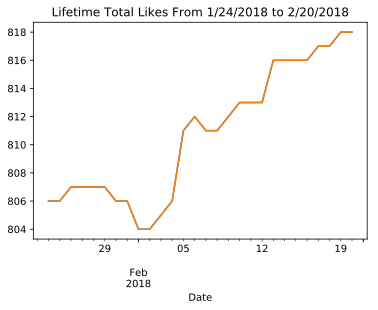

In [73]:
print("Lifetime Total Likes: Total number of people who have liked your Page (unique users) \n")
title = "Lifetime Total Likes From " + date1 + " to " + date2
df = pd.DataFrame( data, columns = ["Lifetime Total Likes"])
ax = df["Lifetime Total Likes"].plot(title=title)
print(str(int(df.iloc[-1])-int(df.iloc[0])) + " New Likes From " + date1 + " To " + date2)
fig = ax.get_figure()
t="LifetimeTotalLikes-" + f_string
fig.savefig(directory + "/" + t)
df["Lifetime Total Likes"].plot(title=title)
None

The most daily likes for the QEII Library Facebook page (5) were on 2018-02-05


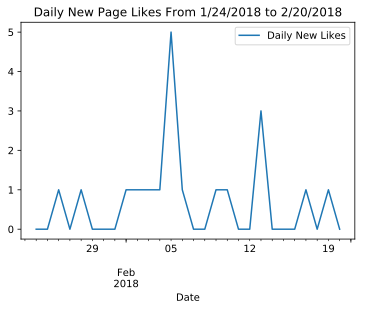

In [74]:
df = pd.DataFrame( data, columns = ["Daily New Likes"])
df = df.fillna(0)
print("The most daily likes for the QEII Library Facebook page (" + str(df["Daily New Likes"].max()) + ") were on " + str(df["Daily New Likes"].idxmax())[0:10])
ax = df.plot(title="Daily New Page Likes From " + date1 + " to " + date2)
fig = ax.get_figure()
t="DailyNewLikes-" + f_string
fig.savefig(directory + "/" + t)

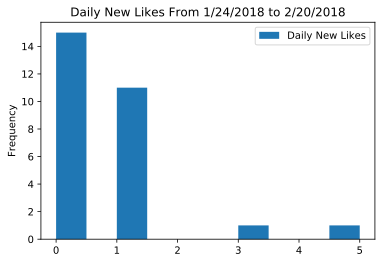

In [75]:
ax = df.plot.hist(title='Daily New Likes From ' + date1 + ' to ' + date2)
fig = ax.get_figure()
t="DailyNewLikes-" + f_string
fig.savefig(directory + "/" + t)
None

Reach is the total number of people who see your content. Impressions are the number of times your content is displayed, no matter if it was clicked or not. 

Daily Total Reach: The number of people for whom any content from your Page or about your Page entered their screen. This includes posts, check-ins, ads, social information from people who interact with your Page and more (unique users). 

The highest daily total reaches were 
Date
2018-02-05    2937
2018-02-06    1833
2018-02-02     988
2018-02-07     792
2018-02-08     630
Name: Daily Total Reach, dtype: int64


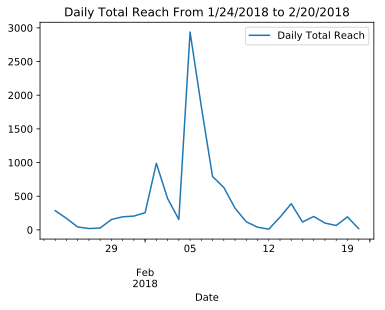

In [76]:
df = pd.DataFrame( data, columns = ["Daily Total Reach"])
df = df.fillna(0)

print("Reach is the total number of people who see your content. Impressions are the number of times your content is displayed, no matter if it was clicked or not. \n")
print("Daily Total Reach: The number of people for whom any content from your Page or about your Page entered their screen. This includes posts, check-ins, ads, social information from people who interact with your Page and more (unique users). \n")

ax = df.plot(title='Daily Total Reach From ' + date1 + ' to ' + date2)
fig = ax.get_figure()
t="DailyTotalReach-" + f_string
fig.savefig(directory + "/" + t)

print("The highest daily total reaches were ")
print df['Daily Total Reach'].nlargest(5)
None

Daily Page Engaged Users: Number of people who engaged with your Page. Engagement includes any click or story created. (unique users) 

The highest daily engaged users were 
Date
2018-02-02    166
2018-02-05    101
2018-02-03     56
2018-02-07     48
2018-02-06     38
Name: Daily Page Engaged Users, dtype: int64


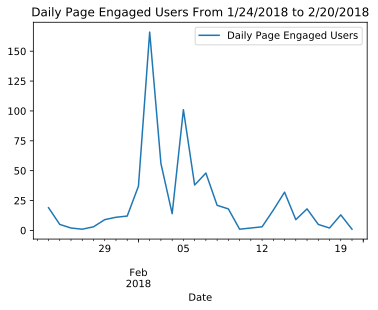

In [77]:
df = pd.DataFrame( data, columns = ["Daily Page Engaged Users"])
df = df.fillna(0)
print("Daily Page Engaged Users: Number of people who engaged with your Page. Engagement includes any click or story created. (unique users) \n")
ax = df.plot(title='Daily Page Engaged Users From ' + date1 + ' to ' + date2)

fig = ax.get_figure()
t="DailyTotalEngaged-" + f_string
fig.savefig(directory + "/" + t)

print("The highest daily engaged users were ")
print df['Daily Page Engaged Users'].nlargest(5)
None

Daily Viral Reach: The number of people for whom any content from your Page or about your Page entered their screen with social information attached. As a form of organic distribution, social information is shown when a person's friend interacts with your Page or post. This includes when someone's friend likes or follows your Page, engages with a post, shares a photo of your Page and checks in to your Page (unique users). 

The most viral posts were 
Date
2018-02-05    4292
2018-02-06    2670
2018-02-02    1277
2018-02-07     850
2018-02-08     662
Name: Daily Viral Impressions, dtype: int64


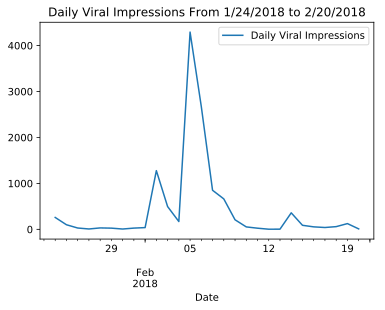

In [78]:
df = pd.DataFrame( data, columns = ["Daily Viral Impressions"])
df = df.fillna(0)
print("Daily Viral Reach: The number of people for whom any content from your Page or about your Page entered their screen with social information attached. As a form of organic distribution, social information is shown when a person's friend interacts with your Page or post. This includes when someone's friend likes or follows your Page, engages with a post, shares a photo of your Page and checks in to your Page (unique users). \n")
ax = df.plot(title='Daily Viral Impressions From ' + date1 + ' to ' + date2)
fig = ax.get_figure()
t = "DailyViralImpressions-" + f_string
fig.savefig(directory + "/" + t)
print("The most viral posts were ")
print df['Daily Viral Impressions'].nlargest(5)
None

Daily Organic Impressions: The number of times that your Page's posts entered a person's screen through unpaid distribution (total count). 

The most organic daily total impressions were: 
Date
2018-02-05    4355
2018-02-06    2695
2018-02-02    2657
2018-02-07    1377
2018-02-08    1041
Name: Daily Organic Impressions, dtype: int64


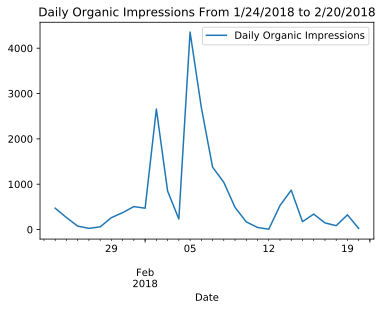

In [79]:
df = pd.DataFrame( data, columns = ["Daily Organic Impressions"])
df = df.fillna(0)
print("Daily Organic Impressions: The number of times that your Page's posts entered a person's screen through unpaid distribution (total count). \n")
ax = df.plot(title='Daily Organic Impressions From ' + date1 + ' to ' + date2)
fig = ax.get_figure()
t = "DailyOrganicImpressions-" + f_string
fig.savefig(directory + "/" + t)
print("The most organic daily total impressions were: ")
print df['Daily Organic Impressions'].nlargest(5)
None

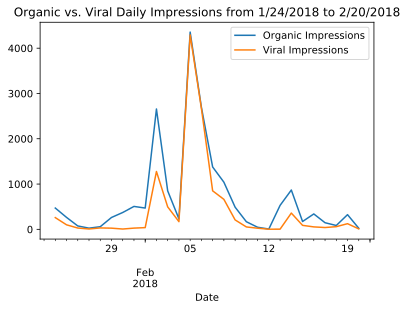

In [80]:
df = pd.DataFrame( {"Organic Impressions": data["Daily Organic Impressions"], "Viral Impressions": data["Daily Viral Impressions"], })
df = df.fillna(0)
ax = df.plot(title="Organic vs. Viral Daily Impressions from " + date1 + " to " + date2)
fig = ax.get_figure()
t = "OrganicVsViral-" + f_string
fig.savefig(directory + "/" + t)
None

Daily Total Impressions: The number of times that any content from your Page or about your Page entered a person's screen. This includes posts, check-ins, ads, social information from people who interact with your Page and more (total count). 

The most daily total impressions were: 
Date
2018-02-05    4372
2018-02-06    2699
2018-02-02    2675
2018-02-07    1388
2018-02-08    1045
Name: Daily Total Impressions, dtype: int64


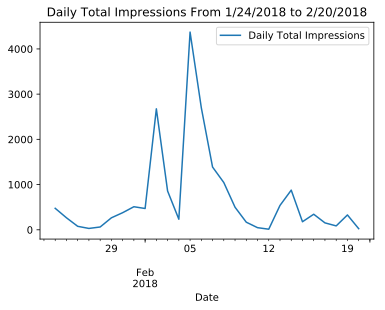

In [81]:
df = pd.DataFrame( data, columns = ["Daily Total Impressions"])
df = df.fillna(0)
print("Daily Total Impressions: The number of times that any content from your Page or about your Page entered a person's screen. This includes posts, check-ins, ads, social information from people who interact with your Page and more (total count). \n")
ax = df.plot(title='Daily Total Impressions From ' + date1 + ' to ' + date2)
fig = ax.get_figure()
t = "DailyTotalImpressions-" + f_string
fig.savefig(directory + "/" + t)
print("The most daily total impressions were: ")
print df['Daily Total Impressions'].nlargest(5)
None

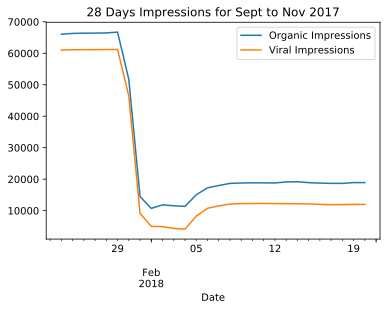

In [82]:
df = pd.DataFrame( {"Organic Impressions": data["28 Days Organic Impressions"], "Viral Impressions": data["28 Days Viral Impressions"], })
df = df.fillna(0)
ax = df.plot(title="28 Days Impressions for Sept to Nov 2017")
fig = ax.get_figure()
t = "OrganicVsViral28Days-" + f_string
fig.savefig(directory + "/" + t)

None

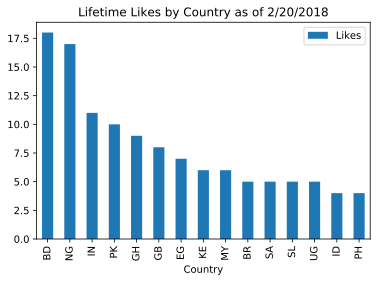

In [83]:
demo = xlsxfile.parse('Lifetime Likes By Country', index_col = 1, header = 0)
demo = demo.fillna(0)
demo = demo.drop('Description', 1)
demo
df = pd.DataFrame([[1,2]], columns=["Country","Likes"])
for i in demo[:]:
    df2 = pd.DataFrame([[i,demo[i].max()]], columns=["Country","Likes"])
    df = df.append(df2, ignore_index=True)
df.drop(df.index[:1], inplace=True)
df = df.set_index('Country')
df = df[df['Likes'] < df['Likes'].max() ]
df = df[df['Likes'] < df['Likes'].max() ]
top = df.nlargest(15,"Likes")
ax = top.plot.bar(title="Lifetime Likes by Country as of " + date2)
fig = ax.get_figure()
t = "LifetimeLikesByCountry-" + f_string
fig.savefig(directory + "/" + t)
None

Daily Page Consumption by Type: Number of clicks on any of your content, by type. Stories generated without clicks on Page content (e.g. liking the Page in Timeline) are not included. (total count)


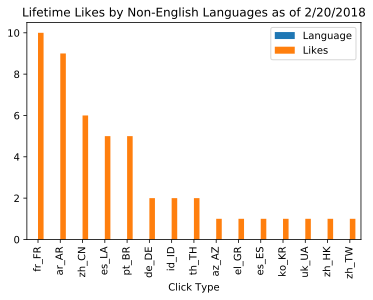

In [84]:
demo = xlsxfile.parse('Lifetime Likes by Language', index_col = 1, header = 0)
demo = demo.fillna(0)
demo = demo.drop('Description', 1)
demo
df = pd.DataFrame([[1,2]], columns=["Language","Likes"])
print("Daily Page Consumption by Type: Number of clicks on any of your content, by type. Stories generated without clicks on Page content (e.g. liking the Page in Timeline) are not included. (total count)")
for i in demo[:]:
    df2 = pd.DataFrame([[i,demo[i].max()]], columns=["Click Type","Likes"])
    df = df.append(df2, ignore_index=True)
df.drop(df.index[:1], inplace=True)
df = df.set_index('Click Type')
df = df[df['Likes'] < df['Likes'].max() ]
df = df[df['Likes'] < df['Likes'].max() ]
top = df.nlargest(15,"Likes")
ax = top.plot.bar(title="Lifetime Likes by Non-English Languages as of " + date2)
fig = ax.get_figure()
t = "LifetimeLikesByNonEnglishLanguage-" + f_string
fig.savefig(directory + "/" + t)
None

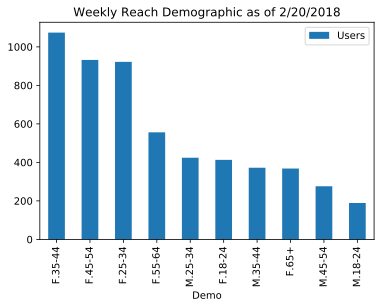

In [85]:
demo = xlsxfile.parse('Weekly Reach Demographics', index_col = 1, header = 0)
demo = demo.fillna(0)
demo = demo.drop('Description', 1)
demo
df = pd.DataFrame([[1,2]], columns=["Demo","Users"])

for i in demo[:]:
    df2 = pd.DataFrame([[i,demo[i].max()]], columns=["Demo","Users"])
    df = df.append(df2, ignore_index=True)
df.drop(df.index[:1], inplace=True)
df = df.set_index('Demo')
top = df.nlargest(10,"Users")
ax = top.plot.bar(title="Weekly Reach Demographic as of " + date2)
fig = ax.get_figure()
t = "WeeklyReachDemo-" + f_string
fig.savefig(directory + "/" + t)
None

Daily Page Consumption by Type: Number of clicks on any of your content, by type. Stories generated without clicks on Page content (e.g. liking the Page in Timeline) are not included. (total count)


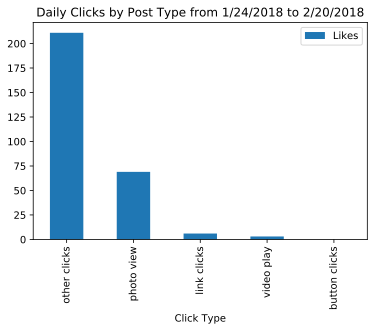

In [86]:
demo = xlsxfile.parse('Daily Page consumptions by type', index_col = 1, header = 0)
demo = demo.fillna(0)
demo = demo.drop('Description', 1)
demo
df = pd.DataFrame([[1,2]], columns=["Click Type","Likes"])
print("Daily Page Consumption by Type: Number of clicks on any of your content, by type. Stories generated without clicks on Page content (e.g. liking the Page in Timeline) are not included. (total count)")
for i in demo[:]:
    df2 = pd.DataFrame([[i,demo[i].max()]], columns=["Click Type","Likes"])
    df = df.append(df2, ignore_index=True)
df.drop(df.index[:1], inplace=True)
df = df.set_index('Click Type')
top = df.nlargest(5,"Likes")
ax = top.plot.bar(title="Daily Clicks by Post Type from " + date1 + " to " + date2)
fig = ax.get_figure()
t = "DailyClicksByPostType-" + f_string
fig.savefig(directory + "/" + t)
None

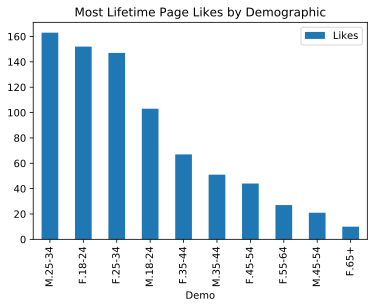

In [87]:
demo = xlsxfile.parse('Lifetime Likes by Gender and...', index_col = 1, header = 0)
demo = demo.fillna(0)
demo = demo.drop('Description', 1)
demo
df = pd.DataFrame([[1,2]], columns=["Demo","Likes"])

for i in demo[:]:
    df2 = pd.DataFrame([[i,demo[i].max()]], columns=["Demo","Likes"])
    df = df.append(df2, ignore_index=True)
df.drop(df.index[:1], inplace=True)
df = df.set_index('Demo')
top = df.nlargest(10,"Likes")
ax = top.plot.bar(title="Most Lifetime Page Likes by Demographic")
fig = ax.get_figure()
t = "MostLifetimePageLikesByDemo-" + f_string
fig.savefig(directory + "/" + t)
None